### Walk through of a general usage of `CMB_skypatch`

Load packages etc

In [1]:
import json
import numpy as np
import os
import cmb_skypatch.plot
import matplotlib.pyplot as plt
import healpy as hp
import component_separation.io as io
import matplotlib.gridspec as gridspec
import component_separation.powspec as pw
import itertools
import platform
from component_separation.cs_util import Config as csu
from component_separation.cs_util import Helperfunctions as hpf
from cmb_skypatch.lib_emp import Lib_emp
from cmb_skypatch.lib import Lib
from matplotlib.patches import Patch
import cmb_skypatch.plot as plot

import cmb_skypatch
with open(os.path.dirname(cmb_skypatch.__file__)+'/config.json', "r") as f:
    cf = json.load(f)

uname = platform.uname()
if uname.node == "DESKTOP-KMIGUPV":
    mch = "XPS"
else:
    mch = "NERSC"

MSC: reverting to standard healpy


/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/pyfits/__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  spectrum_trth = pd.read_csv(
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib.py:35: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  spectrum_trth = pd.read_csv(
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packa

loaded {'030': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/LFI_SkyMap_030_1024_R4.00_full.fits', '044': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/LFI_SkyMap_044_1024_R4.00_full.fits', '070': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/LFI_SkyMap_070_1024_R4.00_full.fits', '100': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/HFI_SkyMap_100_2048_R4.00_full.fits', '143': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/HFI_SkyMap_143_2048_R4.00_full.fits', '217': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/HFI_SkyMap_217_2048_R4.00_full.fits', '353': '/global/cfs/cdirs/cmb/data/planck2020/pla/frequency_maps/Single-frequency/HFI_SkyMap_353_2048_R4.00_full.fits'}


### Load empiric data, one spectrum per detector
you may want to run component_separation to create them

In [2]:
filename = io.make_filenamestring(cf)
print(80*"$")
print("Starting run with the following settings:")
print(cf['pa'])
print("Generated filename(s) for this session: {}".format(filename))
print(80*"$")

emp_C_ltot = io.load_data(io.spec_sc_path_name)
emp_cov_ltot = pw.build_covmatrices(emp_C_ltot, cf['pa']['lmax'], cf['pa']['freqfilter'], cf['pa']['specfilter'])

emp_C_lN = io.load_data(io.noise_sc_path_name)
emp_cov_lN = pw.build_covmatrices(emp_C_lN, cf['pa']['lmax'], cf['pa']['freqfilter'], cf['pa']['specfilter'])

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Starting run with the following settings:
{'Tscale': 'K_CMB', 'mskset': 'lens', 'freqdset': 'NPIPE', 'lmax': 3000, 'smoothing_par': [0], 'npatch': [1, 8, 16, 32], 'lmax_mask': 6000, 'smoothing_window': 0, 'max_polynom': 0, 'freqdatsplit': '', 'detector': ['030', '044', '070', '100', '143', '217', '353'], 'freqfilter': ['545', '857'], 'specfilter': ['TT', 'TB', 'TE', 'EB', 'ET', 'BT', 'BE', 'BB'], 'nside': [1024, 2048]}
Generated filename(s) for this session: _C_l_NPIPE_lens_3000_6000_0_0_Full.npy
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_C_l_NPIPE_sim_lens_3000_6000_0_0_Full.npy
loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim_diff/SPEC0200_C_l_NPIPE_sim_diff_lens_3000_6000_0_0_Full.npy


### Create a `Lib_emp` object.
The data structure is very similar to the `Lib` object
Currently, `Lib_emp` doesnt support patches or smoothing, thus dictionary must be set
to {'1': { '0': [..] } }.

In [3]:
emp = {'1': { '0': # emp[npatches][smoothing_par]
    Lib_emp(dov_ltot=np.array([emp_cov_ltot["EE"]]), dov_lN=np.array([emp_cov_lN["EE"]]))}}

/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:68: RuntimeWarning: invalid value encountered in true_divide
  self.C_lS = Lib_emp.spectrum_trth[:self.shape[0]].to_numpy()/(ll*(ll+1))*2*np.pi
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:78: RuntimeWarning: invalid value encountered in true_divide
  self.cov_ltot = dov_ltot/(ll*(ll+1))*2*np.pi
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:83: RuntimeWarning: invalid value encountered in true_divide
  self.cov_lN = dov_lN/(ll*(ll+1))*2*np.pi
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib_emp.py:143: RuntimeWarning: divide by zero encountered in true_divide
  ret[row, col] = 1/np.diag(ret)


### Create `Lib` objects. 
One can decide the number of patches and smoothing, for which the spectra are generated. The spectra are 'analytic', i.e.

  * C_lS is taken from planck best fits,
  * C_lN is build by generating npatch patches of the sky, based on equi-noise-level-areas and is then
      deconvolved with the respective beamwindowfunction,
  * C_lF is currently not supported.
By creating the Lib-object, the parameter `cov_ltot_min` is computed, which is the

In [4]:
spdata = dict()
for n in cf['pa']['npatch']:
    if str(n) in spdata.keys():
        pass
    else:
        spdata.update({str(n): dict()})
    for smooth in cf['pa']['smoothing_par']:
        if str(smooth) in spdata[str(n)].keys():
            pass
        else:
            spdata[str(n)].update({str(smooth): 
                Lib(npatch = n, smoothing_par = smooth, C_lF=None, C_lN=None), fsky=})

(1,) 5.308346850268287e-09
(1,) 8.121775135576938e-09
(1,) 5.617923875565235e-09
(1,) 5.08471957127459e-09
(1,) 1.5010781601362888e-09
(1,) 3.1460292815688405e-09
(1,) 5.168839576136413e-08


/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib.py:83: RuntimeWarning: invalid value encountered in true_divide
  self.C_lS = Lib.spectrum_trth[:self.shape[0]].to_numpy()/(ll*(ll+1))*2*np.pi
/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/lib.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ret[row, col] = 1/np.diag(ret)


(8,) 5.2891861611715465e-09
(8,) 8.101982946904249e-09
(8,) 5.600826781948789e-09
(8,) 5.058394083587303e-09
(8,) 1.491987318327063e-09
(8,) 3.1297965793436534e-09
(8,) 5.13813966677137e-08
(16,) 5.267722357586065e-09
(16,) 8.07755114677475e-09
(16,) 5.5808179744891845e-09
(16,) 5.030743230281198e-09
(16,) 1.481868278670812e-09
(16,) 3.112686300631609e-09
(16,) 5.1030024537799134e-08
(32,) 5.225197571102257e-09
(32,) 8.029902697126502e-09
(32,) 5.542512017381389e-09
(32,) 4.9745734815014866e-09
(32,) 1.4614810298768829e-09
(32,) 3.0774633271280454e-09
(32,) 5.034269195889279e-08


### Custom plotting to check the results

/global/u2/s/sebibel/git/cmb_skypatch/cmb_skypatch/plot.py:94: RuntimeWarning: invalid value encountered in true_divide
  data_empiric.cov_ltot_min[0,:-1]*hpf.llp1e12(np.arange(0,3000,1))*1e-12/data[npatch]['0'].cov_ltot_min[0,:-1]-1,
/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:231: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:232: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)
/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:232: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(sy2/n - mean*mean)


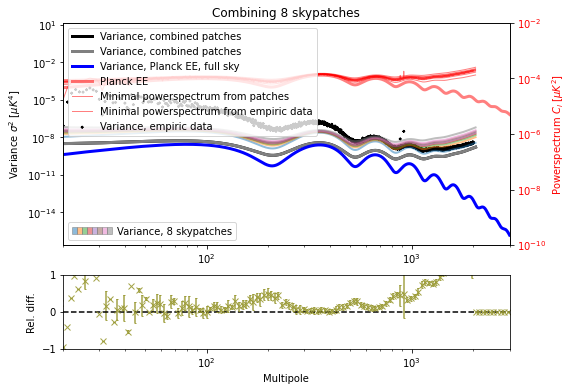

<Figure size 432x288 with 0 Axes>

In [9]:
plot.spectrum_variance(
    emp['1']['0'],
    spdata,
    rd_ylim=(-0.2,0.7),
    npatch= str(cf['pa']['npatch'][1]),
    smoothing_par = str(cf['pa']['smoothing_par'][0]),
    show = True
)

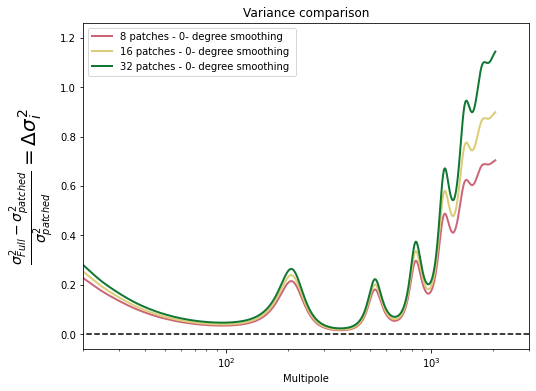

<Figure size 432x288 with 0 Axes>

In [10]:
plot.compare_variance_min(spdata, show=True)

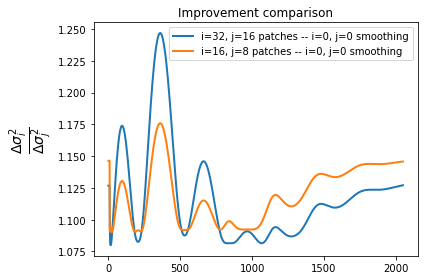

<Figure size 432x288 with 0 Axes>

In [11]:
plot.compare_improvement(spdata, ["32_0-16_0","16_0-8_0"], show=True)

/global/common/cori_cle7/software/python/3.8-anaconda-2020.11/lib/python3.8/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


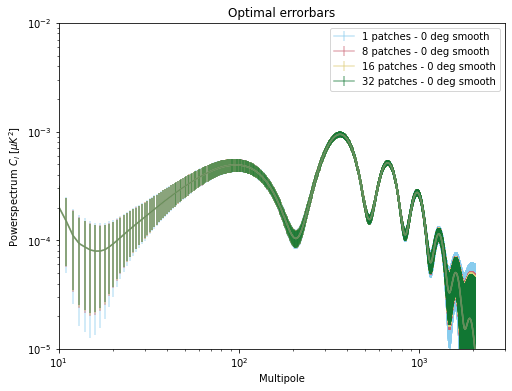

<Figure size 432x288 with 0 Axes>

In [12]:
plot.compare_errorbars(spdata, ['0'], show=True)

In [8]:
import os.path as path
def iff_make_dir(outpath_name):
    if path.exists(outpath_name):
        pass
    else:
        os.makedirs(outpath_name)
iff_make_dir(cf[mch]['outdir_vis_ap'])

/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:231: RuntimeWarning: invalid value encountered in true_divide
  bins=bins,
/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:232: RuntimeWarning: invalid value encountered in true_divide
  weights=val * val)
/global/u2/s/sebibel/git/component_separation/component_separation/cs_util.py:232: RuntimeWarning: invalid value encountered in sqrt
  weights=val * val)


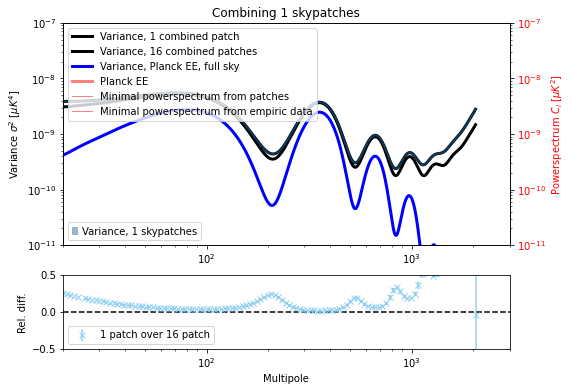

In [71]:
data = spdata
data_empiric = emp['1']['0']
npatch = '1'
C_lS = data[npatch]['0'].C_lS
cov_ltot_min = data[npatch]['0'].cov_ltot_min
variance_min_ma = data[npatch]['0'].approx_variance_min_ma
variance = data[npatch]['0'].approx_variance
CB_color_cycle = ["#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888","#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888"]
plt.figure(figsize=(8,6))

gs = gridspec.GridSpec(2, 1, height_ratios=[3,1])
ax0 = plt.subplot(gs[0])
ll = np.arange(0,variance_min_ma.shape[0],1)

ax0.plot(data['1']['0'].approx_variance_min_ma, label='Variance, 1 combined patch', lw=3, ls="-", color="black")
ax0.plot(data['16']['0'].approx_variance_min_ma, label='Variance, 16 combined patches', lw=3, ls="-", color="black")
# ax0.scatter(
#     ll,
#     data_empiric.approx_variance_min_ma*(hpf.llp1e12(np.arange(0,3000+1,1)))**2*1e-24/0.670629620552063,
#     label="Minimal variance, empiric data",
#     lw=1, ls="--", color="black", s=3, marker='x', alpha=0.5)

ax0.plot(2*C_lS*C_lS/((2*ll+1)), label="Variance, Planck EE, full sky", lw=3, ls="-", color="blue")
# plt.plot(loc_opt_NN, label = "Variance, Planck EE, combined patches", lw=3, ls="--", color="green")

ax0.plot(C_lS, label = 'Planck EE', lw=3, ls="-", color="red", alpha=0.5)

for n in range(cov_ltot_min.shape[0]):
    ax0.plot(cov_ltot_min[n,:], lw=1, ls="-", color="red", alpha=0.5)
ax0.plot(0,0, label='Minimal powerspectrum from patches', color='red', alpha=0.5, lw=1)
ax0.plot(data_empiric.cov_ltot_min[0,:]*hpf.llp1e12(np.arange(0,3000+1,1))*1e-12, label='Minimal powerspectrum from empiric data', color='red', alpha=0.5, lw=1)

leg1 = ax0.legend(loc='upper left')
pa = [None for n in range(variance.shape[1])]
for n in range(len(pa)):
    p = ax0.plot(variance[:,n,n], lw=2, ls="-", alpha=0.5)
    col = p[0].get_color()
    pa[n] = Patch(facecolor=col, edgecolor='grey', alpha=0.5)
leg2 = ax0.legend(handles=pa[:min(20,len(pa))],
        labels=["" for n in range(min(20,len(pa))-1)] + ['Variance, {} skypatches'.format(str(cov_ltot_min.shape[0]))],
        ncol=variance.shape[1], handletextpad=0.5, handlelength=0.5, columnspacing=-0.5,
        loc='lower left')

ax0.add_artist(leg1)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel(r"Variance $\sigma^2$ [$\mu K^4$]")
ax0.set_xlim((2e1,3e3))
ax0.set_ylim((1e-11,1e-7))

# ax0.set_ylim((1e-10,1e-2))
# plt.tight_layout()
ax2 = ax0.twinx()
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylabel(r'Powerspectrum $C_l$ [$\mu K^2$]', color= 'red')
# ax2.set_ylim((1e-10,1e-2))
ax2.set_ylim((1e-11,1e-7))
ax2.set_yscale('log')
ax0.set_title("Combining {} skypatches".format(str(cov_ltot_min.shape[0])))
ax1 = plt.subplot(gs[1])
binwidth = 200
bins = np.logspace(np.log10(1), np.log10(cf['pa']['lmax']+1), binwidth)
bl = bins[:-1]
br = bins[1:]
# binmean, binerr , _ = hpf.std_dev_binned(
#         data_empiric.cov_ltot_min[0,:-1]*hpf.llp1e12(np.arange(0,3000,1))*1e-12/data[npatch]['0'].cov_ltot_min[0,:-1]-1,
#         lmax=cf['pa']['lmax'],
#         binwidth=binwidth)
# binmean, binerr , _ = hpf.std_dev_binned(
#     (data_empiric.approx_variance_min_ma*(hpf.llp1e12(np.arange(0,3000+1,1)))**2*1e-24/0.670629620552063/data[npatch]['0'].approx_variance_min_ma).data-1,
#     lmax=cf['pa']['lmax']+1,
#     binwidth=binwidth)
binmean, binerr , _ = hpf.std_dev_binned(
    (data['1']['0'].approx_variance_min_ma/data['16']['0'].approx_variance_min_ma).data-1,
    lmax=cf['pa']['lmax']+1,
    binwidth=binwidth)
ax1.errorbar(0.5 * bl + 0.5 * br, binmean, binerr, fmt='x', capsize=1,
        color=CB_color_cycle[n], alpha=0.9, label = '1 patch over 16 patch')
ax1.legend()
# ax1.scatter(ll, hpf.std_dev_binned(data_empiric.approx_variance_min_ma/variance_min_ma-1, label='Ratio', color='black', s=3, marker='x')
ax1.set_xlabel("Multipole")
ax1.set_ylabel(r"Rel. diff.")
ax1.set_ylim((-0.5,0.5))
ax1.set_xscale('log')
ax1.set_xlim((2e1,3e3))
ax1.hlines(0,2e1,3e3, color='black', ls='--')

In [50]:
from astropy.io import fits
pmask = hp.read_map("/global/homes/s/sebibel/data/mask/PR3vJan18_temp_lensingmask_gPR2_70_psPR2_143_COT2_smicadx12_smicapoldx12_psPR2_217_sz.fits.gz")
hdul = fits.open("/global/homes/s/sebibel/data/mask/PR3vJan18_temp_lensingmask_gPR2_70_psPR2_143_COT2_smicadx12_smicapoldx12_psPR2_217_sz.fits.gz")
hp.mollview(pmask)
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096 / length of dimension 1                          
NAXIS2  =                49152 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'I       '                                                            
TFORM1  = '1024E   '                                                            
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
EXTNAME = 'xtension'        

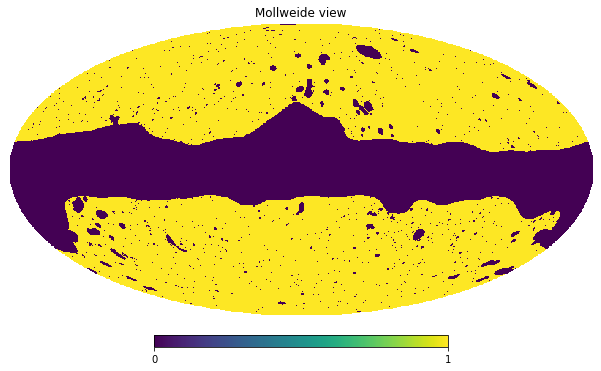

In [52]:
hp.mollview(pmask)
hdul[1].header

In [56]:
print(sum(pmask)/len(pmask))

0.670629620552063
